In [ ]:
!pip install beautifulsoup4
!pip install requests
!pip install vaderSentiment
!pip install textblob
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 54.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 20.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-many

### **Importing libraries**

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import time
import re
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from flair.models import TextClassifier
from flair.data import Sentence
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Sentiment Analysis**

In [ ]:
ram_data = pd.read_csv('RAM_cleaned_reviews.csv')

### using VADER

In [ ]:
# Perform sentiment analysis using VADER
analyzer = SentimentIntensityAnalyzer()
ram_data['sentiment_score'] = ram_data['cleaned_reviews'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
ram_data.head()

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

ram_data['sentiment_score'] = ram_data['cleaned_reviews'].apply(vadersentimentanalysis)


def vader_analysis(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05 :
        return 'Negative'
    else:
        return 'Neutral'

ram_data['analysis'] = ram_data['sentiment_score'].apply(vader_analysis)

ram_data.head()

,Review,Rating,cleaned_reviews,sentiment_score,analysis
0,✅Trip Verified| Very smooth check-in at Casabl...,4/10,smooth checkin casablanca though security pass...,0.9100,Positive
1,✅Trip Verified| Royal Air Maroc is bar none t...,7/10,royal air maroc bar none best airline ive ever...,0.9141,Positive
2,Not Verified| There is a need for an upgrade i...,10/10,need upgrade seats comfortable additionally to...,0.8910,Positive
3,"Not Verified| This is, without doubt, the wor...",2/10,without doubt worst airline ever flown changed...,-0.4922,Negative
4,✅Trip Verified| London Heathrow to Roberts in...,3/10,london heathrow roberts international monrovia...,-0.9001,Negative


In [ ]:
analysis = ram_data['analysis'].value_counts()
analysis

analysis
Negative    177
Positive    167
Neutral       7
Name: count, dtype: int64

In [ ]:
# Calculate the count of each sentiment category
sentiment_counts = ram_data['analysis'].value_counts()

# Calculate the total number of reviews
total_reviews = len(ram_data)

# Calculate the percentage of each sentiment category
positive_percentage = (sentiment_counts['Positive'] / total_reviews) * 100
negative_percentage = (sentiment_counts['Negative'] / total_reviews) * 100
neutral_percentage = (sentiment_counts['Neutral'] / total_reviews) * 100

# Display the percentages
print("Percentage of Positive Reviews: {:.2f}%".format(positive_percentage))
print("Percentage of Negative Reviews: {:.2f}%".format(negative_percentage))
print("Percentage of Neutral Reviews: {:.2f}%".format(neutral_percentage))

Percentage of Positive Reviews: 47.58%
Percentage of Negative Reviews: 50.43%
Percentage of Neutral Reviews: 1.99%


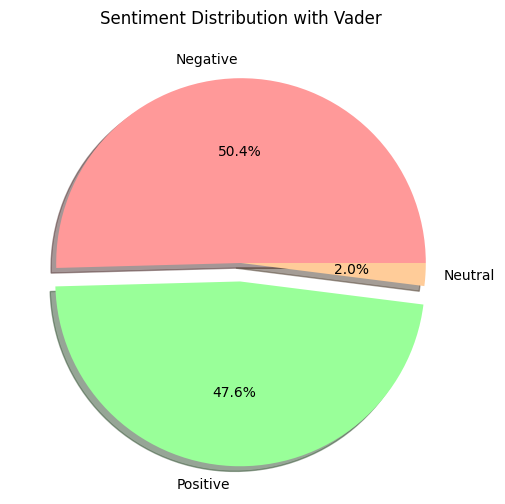

In [ ]:
# Plotting sentiment distribution
plt.figure(figsize=(8, 6))
plt.title('Sentiment Distribution with Vader')
# only "explode" the 2nd slice
explode = (0, 0.1, 0)
colors = ['#ff9999','#99ff99','#ffcc99']
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.show()

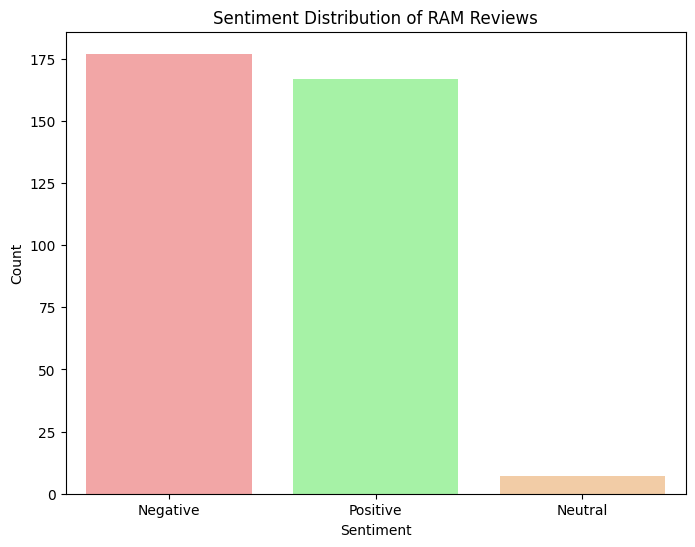

In [ ]:
# Plotting sentiment distribution as a bar plot
plt.figure(figsize=(8, 6))
colors = ['#ff9999','#99ff99','#ffcc99']
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, hue=sentiment_counts.index, palette=colors, legend=False)
plt.title('Sentiment Distribution of RAM Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Filter positive and negative reviews
positive_reviews = ram_data[ram_data['analysis'] == 'Positive']['cleaned_reviews'].values
negative_reviews = ram_data[ram_data['analysis'] == 'Negative']['cleaned_reviews'].values

# Join all positive and negative reviews into a single string
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width = 800, height = 800,
                colormap = 'magma',
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(positive_text)

negative_wordcloud = WordCloud(width = 800, height = 800,
                colormap = 'magma',
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(negative_text)

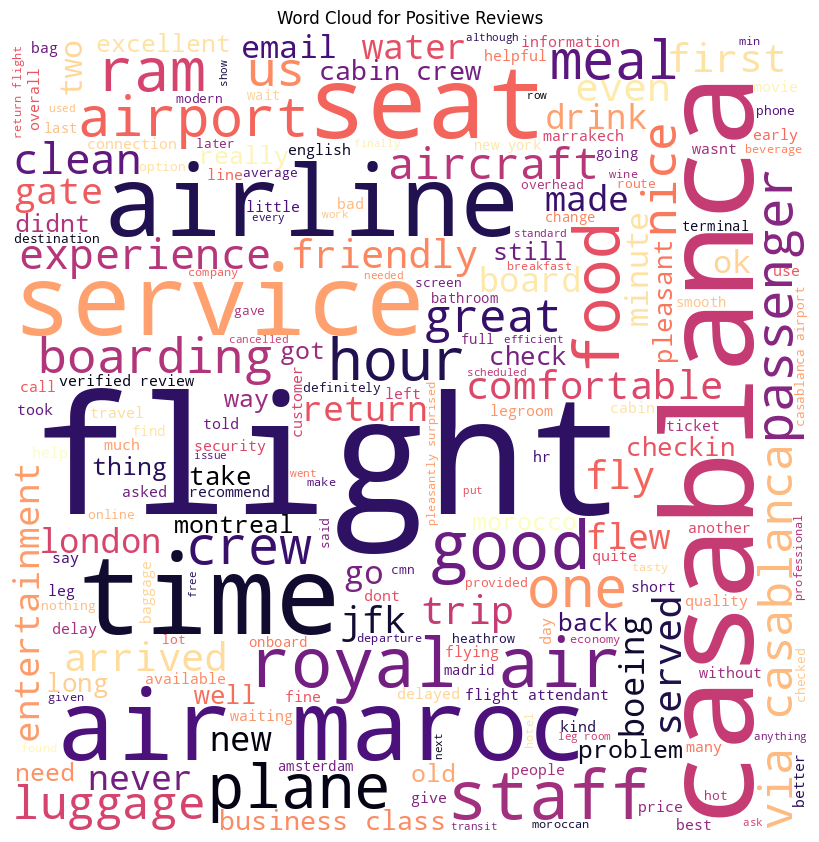

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Positive Reviews')
plt.show()

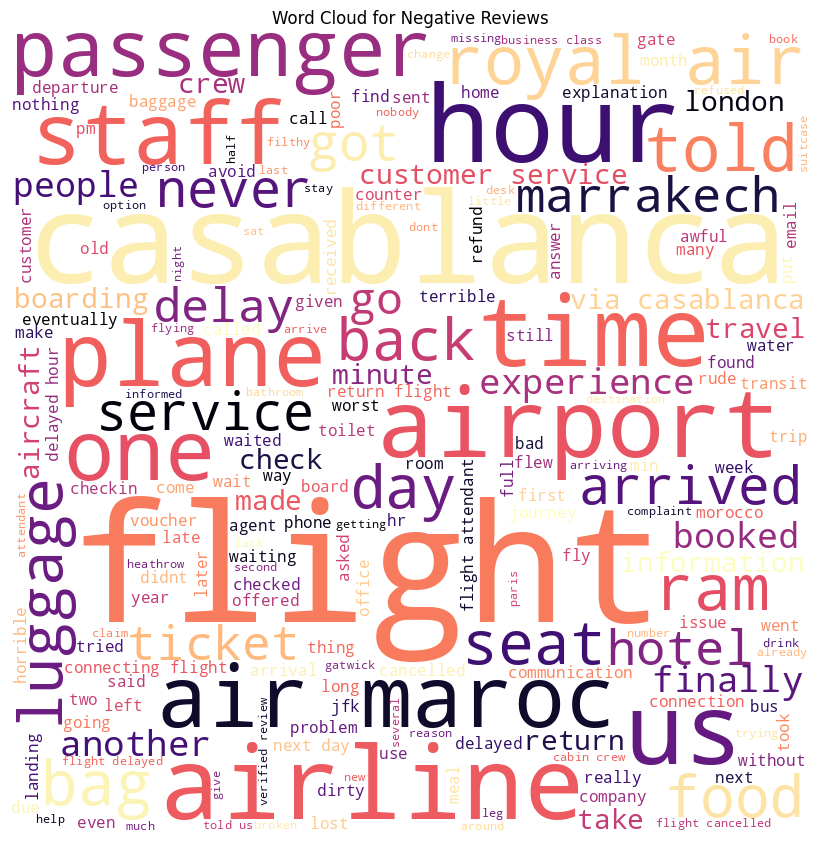

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [ ]:
ram_data[ram_data['Rating'] == 'na']

,Review,Rating,cleaned_reviews,sentiment_score,analysis
256,Flew Barcelona to Tangier. Turned up at BCN ai...,na,flew barcelona tangier turned bcn airport hour...,-0.8860,Negative
257,Lisbon to Marrakech via Casablanca. Lisbon to ...,na,lisbon marrakech via casablanca lisbon casabla...,-0.6124,Negative
258,Just returned home from Marrakech. Aircraft wa...,na,returned home marrakech aircraft b crews weren...,-0.1847,Negative
263,Flew from Marrakech to Fez (via Casablanca) in...,na,flew marrakech fez via casablanca business cla...,-0.8225,Negative
264,Just flew back from Casablanca to JFK - the ai...,na,flew back casablanca jfk airplane dirty food t...,-0.9260,Negative
268,Casablanca to Bologna 1 hour delay. Nobody apo...,na,casablanca bologna hour delay nobody apologize...,-0.3400,Negative
279,Casablanca to JFK - total lack of inflight ser...,na,casablanca jfk total lack inflight service big...,-0.3384,Negative
283,JFK-CMN. Delayed 2 hours aircraft was very old...,na,jfkcmn delayed hours aircraft old nothing work...,0.4826,Positive
287,Economy legroom LHR-CMN return in a 737 and A3...,na,economy legroom lhrcmn return respectively non...,-0.3678,Negative
288,Unfortunately once again Royal Air Maroc's sta...,na,unfortunately royal air marocs staff let cmn l...,-0.8225,Negative


In [ ]:
# Determine the rating class
def get_rating_class(rating):
    if np.isnan(rating):  # Check if rating is NaN
        return 'Unknown'
    elif rating < 5:
        return 'Negative'
    elif rating > 5:
        return 'Positive'
    else:
        return 'Neutral'

# Apply the function to create a new column for rating class
ram_data['rating_class'] = ram_data['Rating'].apply(lambda x: get_rating_class(float(x.split('/')[0]) if '/' in x else np.nan))

In [ ]:
ram_data.head()

,Review,Rating,cleaned_reviews,sentiment_score,analysis,rating_class
0,✅Trip Verified| Very smooth check-in at Casabl...,4/10,smooth checkin casablanca though security pass...,0.9100,Positive,Negative
1,✅Trip Verified| Royal Air Maroc is bar none t...,7/10,royal air maroc bar none best airline ive ever...,0.9141,Positive,Positive
2,Not Verified| There is a need for an upgrade i...,10/10,need upgrade seats comfortable additionally to...,0.8910,Positive,Positive
3,"Not Verified| This is, without doubt, the wor...",2/10,without doubt worst airline ever flown changed...,-0.4922,Negative,Negative
4,✅Trip Verified| London Heathrow to Roberts in...,3/10,london heathrow roberts international monrovia...,-0.9001,Negative,Negative


In [ ]:
ram_data.tail()

,Review,Rating,cleaned_reviews,sentiment_score,analysis,rating_class
346,Of the 6 flights (2 international and 4 domest...,7/10,flights international domestic madridmarrakesh...,0.4588,Positive,Positive
347,Marrakech to LHR via Casablanca. Check in smoo...,1/10,marrakech lhr via casablanca check smooth frie...,0.8910,Positive,Negative
348,This is the most unorganized air line I have e...,7/10,unorganized air line ever flown lost checked b...,-0.7506,Negative,Positive
349,My wife and I flew with this airline from Lond...,na,wife flew airline london fez via casablanca ou...,-0.6948,Negative,Unknown
350,Have had an awful experience with this airline...,4/10,awful experience airline occasions first trip ...,-0.9042,Negative,Negative


In [ ]:
ram_data.iloc[346]['Review']

'Of the 6 flights (2 international and 4 domestic; Madrid-Marrakesh; Essaouira-Casablanca; Casablanca-Fez; Casablanca-Ouarzazate; Ouarzazate-Casablanca; Casablanca-Amsterdam ) only one was on time. The rest delayed for at least an hour. The longest delay was 12 hours for a flight which only took 30 minutes! The problem - there was simply no plane available to bring us to our destination although it was a normal scheduled flight. The only positive thing about the airline is that they put you in a good hotel to wait/spend the night. But I guess that is because they have a lot of experience with that - I will certainly not choice this airline again.'

In [ ]:
ram_data.iloc[4]['Review']

'✅Trip Verified|  London Heathrow to Roberts international Monrovia.  Arrived at Roberts international to find all six pieces of checked baggage were lost it turns out that as far as I could see nobody on the flight received their luggage as all the luggage put out for collection had tags from previous flights. Royal air Maroc staff at the airport were overwhelmed and unable to control 100+ angry travelers. We left the airport on local advice as tempers were being lost and things were starting to look ugly and unsafe. Attended the Royal air Maroc offices in Monrovia several times but staff were rude and unhelpful, on Saturday the 30th December we made a final attempt to collect our luggage only to find the Liberian national guard wearing riot gear were protecting the Sinkor office from angry customers, honestly you could not make this up if you tried. My baggage eventually arrived a week after I had returned to the UK! The tickets were cheap and we got there and back in one piece so if

In [ ]:
# Compare the values of 'analysis' column with 'rating_class' column
comparison = pd.crosstab(ram_data['analysis'], ram_data['rating_class'])

# Display the comparison
print(comparison)

rating_class  Negative  Neutral  Positive  Unknown
analysis                                          
Negative            96        6        48       27
Neutral              5        0         2        0
Positive            93        4        60       10


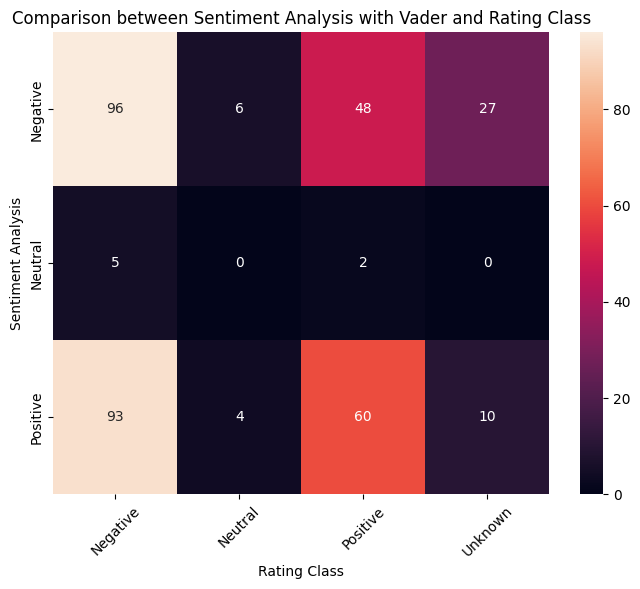

In [ ]:
# Plot a heatmap to visualize the comparison
plt.figure(figsize=(8, 6))
sns.heatmap(comparison, annot=True, fmt='d')
plt.title('Comparison between Sentiment Analysis with Vader and Rating Class')
plt.xlabel('Rating Class')
plt.ylabel('Sentiment Analysis')
plt.xticks(rotation=45)
plt.show()

### using TextBlob

In [ ]:
# Function to calculate sentiment score using TextBlob
def textblob_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity

# Apply the function to create a new column for sentiment score
ram_data['sentiment_score2'] = ram_data['cleaned_reviews'].apply(textblob_sentiment)

In [ ]:
# Function to determine sentiment analysis using TextBlob
def textblob_analysis(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the function to create a new column for sentiment analysis
ram_data['analysis2'] = ram_data['sentiment_score2'].apply(textblob_analysis)

In [ ]:
ram_data.head()

,Review,Rating,cleaned_reviews,sentiment_score,analysis,rating_class,sentiment_score2,analysis2
0,✅Trip Verified| Very smooth check-in at Casabl...,4/10,smooth checkin casablanca though security pass...,0.9100,Positive,Negative,0.317857,Positive
1,✅Trip Verified| Royal Air Maroc is bar none t...,7/10,royal air maroc bar none best airline ive ever...,0.9141,Positive,Positive,0.527778,Positive
2,Not Verified| There is a need for an upgrade i...,10/10,need upgrade seats comfortable additionally to...,0.8910,Positive,Positive,-0.110000,Negative
3,"Not Verified| This is, without doubt, the wor...",2/10,without doubt worst airline ever flown changed...,-0.4922,Negative,Negative,-0.029091,Negative
4,✅Trip Verified| London Heathrow to Roberts in...,3/10,london heathrow roberts international monrovia...,-0.9001,Negative,Negative,-0.044737,Negative


In [ ]:
analysis2 = ram_data['analysis2'].value_counts()
analysis2

analysis2
Positive    192
Negative    156
Neutral       3
Name: count, dtype: int64

In [ ]:
# Calculate the count of each sentiment category
sentiment_counts2 = ram_data['analysis2'].value_counts()

# Calculate the total number of reviews
total_reviews = len(ram_data)

# Calculate the percentage of each sentiment category
positive_percentage = (sentiment_counts2['Positive'] / total_reviews) * 100
negative_percentage = (sentiment_counts2['Negative'] / total_reviews) * 100
neutral_percentage = (sentiment_counts2['Neutral'] / total_reviews) * 100

# Display the percentages
print("Percentage of Positive Reviews: {:.2f}%".format(positive_percentage))
print("Percentage of Negative Reviews: {:.2f}%".format(negative_percentage))
print("Percentage of Neutral Reviews: {:.2f}%".format(neutral_percentage))

Percentage of Positive Reviews: 54.70%
Percentage of Negative Reviews: 44.44%
Percentage of Neutral Reviews: 0.85%


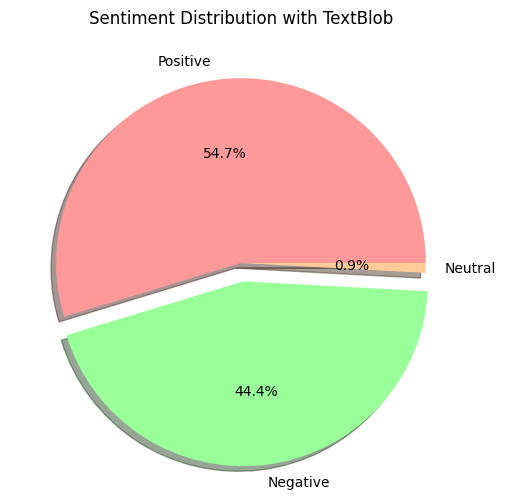

In [ ]:
# Plotting sentiment distribution
plt.figure(figsize=(8, 6))
plt.title('Sentiment Distribution with TextBlob')
# only "explode" the 2nd slice
explode = (0, 0.1, 0)
colors = ['#ff9999','#99ff99','#ffcc99']
plt.pie(sentiment_counts2, labels=sentiment_counts2.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.show()

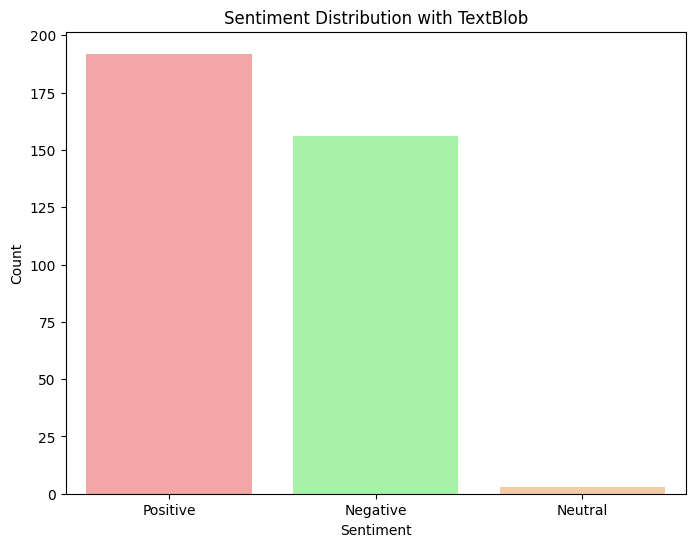

In [ ]:
# Plotting sentiment distribution as a bar plot
plt.figure(figsize=(8, 6))
colors = ['#ff9999','#99ff99','#ffcc99']
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, hue=sentiment_counts2.index, palette=colors, legend=False)
plt.title('Sentiment Distribution with TextBlob')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Filter positive and negative reviews
positive_reviews2 = ram_data[ram_data['analysis2'] == 'Positive']['cleaned_reviews'].values
negative_reviews2 = ram_data[ram_data['analysis2'] == 'Negative']['cleaned_reviews'].values

# Join all positive and negative reviews into a single string
positive_text2 = ' '.join(positive_reviews2)
negative_text2 = ' '.join(negative_reviews2)

# Generate word clouds for positive and negative reviews
positive_wordcloud2 = WordCloud(width = 800, height = 800,
                colormap = 'magma',
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(positive_text2)

negative_wordcloud2 = WordCloud(width = 800, height = 800,
                colormap = 'magma',
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(negative_text2)

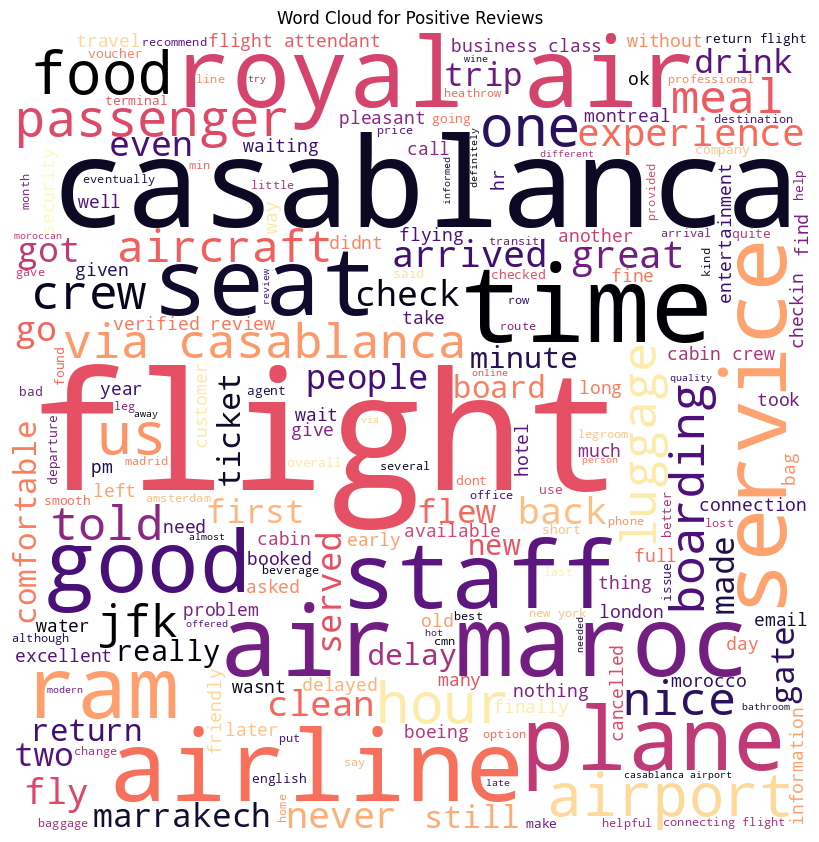

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(positive_wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Positive Reviews')
plt.show()

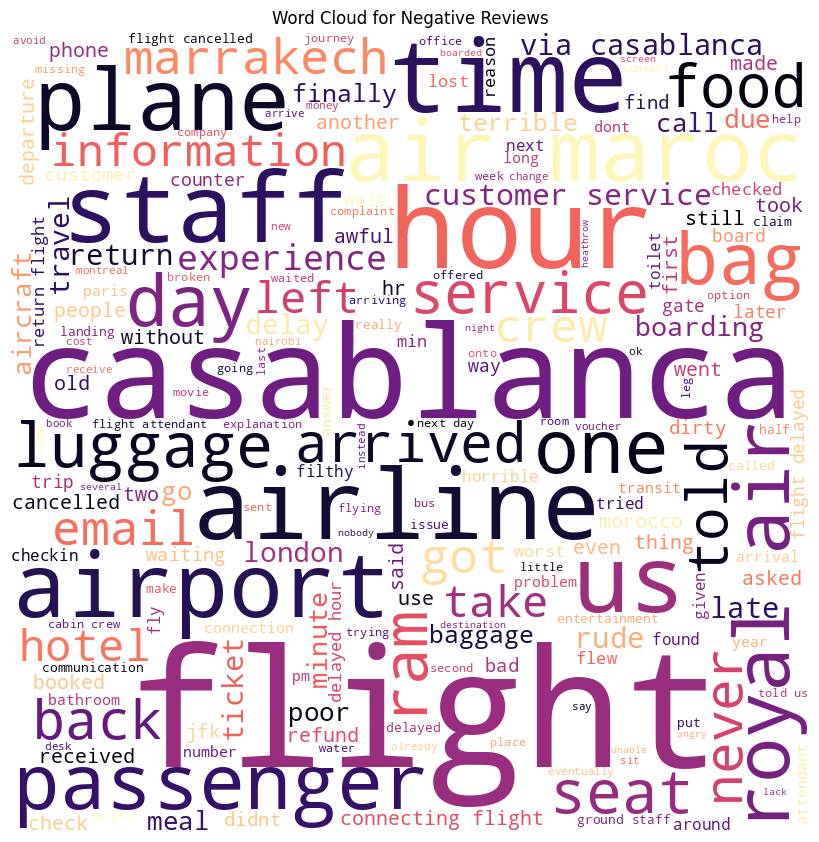

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(negative_wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [ ]:
# Compare the values of 'analysis' column with 'rating_class' column
comparison2 = pd.crosstab(ram_data['analysis2'], ram_data['rating_class'])

# Display the comparison
print(comparison2)

rating_class  Negative  Neutral  Positive  Unknown
analysis2                                         
Negative            91        5        42       18
Neutral              2        0         0        1
Positive           101        5        68       18


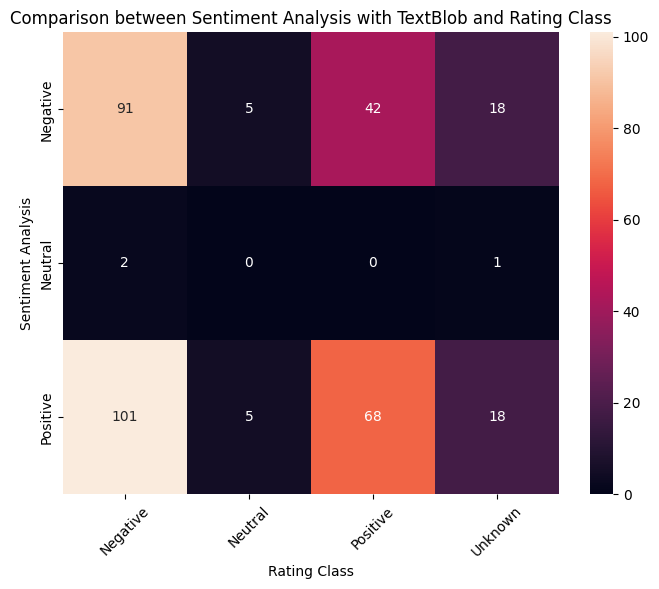

In [ ]:
# Plot a heatmap to visualize the comparison
plt.figure(figsize=(8, 6))
sns.heatmap(comparison2, annot=True, fmt='d')
plt.title('Comparison between Sentiment Analysis with TextBlob and Rating Class')
plt.xlabel('Rating Class')
plt.ylabel('Sentiment Analysis')
plt.xticks(rotation=45)
plt.show()

### using Flair

In [ ]:
# Load the pre-trained sentiment analysis model
classifier = TextClassifier.load('en-sentiment')

# Function to predict sentiment and score for each review
def predict_sentiment(review):
    sentence = Sentence(review)
    classifier.predict(sentence)
    # Get the predicted sentiment and score
    sentiment = sentence.labels[0].value
    score = sentence.labels[0].score
    return sentiment, score

# Apply the function to the 'cleaned_reviews' column and print the length of returned values
print(len(ram_data['cleaned_reviews'].apply(lambda x: predict_sentiment(x))))

# Print the number of columns you are trying to assign in the DataFrame
print(len(['analysis3', 'sentiment_score3']))

2024-05-11 19:07:28,207 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpxs8uwejx


100%|██████████| 253M/253M [00:11<00:00, 24.0MB/s]

2024-05-11 19:07:39,790 copying /tmp/tmpxs8uwejx to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-05-11 19:07:41,002 removing temp file /tmp/tmpxs8uwejx


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

351
2


In [ ]:
# Apply the function to the 'cleaned_reviews' column and assign the results to a temporary variable
temp_results = ram_data['cleaned_reviews'].apply(lambda x: predict_sentiment(x))

In [ ]:
# Reshape the temporary results into a DataFrame
temp_df = pd.DataFrame(temp_results.tolist(), columns=['analysis3', 'sentiment_score3'])

# Assign the reshaped DataFrame to the original DataFrame
ram_data[['analysis3', 'sentiment_score3']] = temp_df

In [ ]:
ram_data.head()

,Review,Rating,cleaned_reviews,sentiment_score,analysis,rating_class,sentiment_score2,analysis2,analysis3,sentiment_score3
0,✅Trip Verified| Very smooth check-in at Casabl...,4/10,smooth checkin casablanca though security pass...,0.9100,Positive,Negative,0.317857,Positive,POSITIVE,0.604253
1,✅Trip Verified| Royal Air Maroc is bar none t...,7/10,royal air maroc bar none best airline ive ever...,0.9141,Positive,Positive,0.527778,Positive,POSITIVE,0.894951
2,Not Verified| There is a need for an upgrade i...,10/10,need upgrade seats comfortable additionally to...,0.8910,Positive,Positive,-0.110000,Negative,NEGATIVE,0.926441
3,"Not Verified| This is, without doubt, the wor...",2/10,without doubt worst airline ever flown changed...,-0.4922,Negative,Negative,-0.029091,Negative,NEGATIVE,0.999400
4,✅Trip Verified| London Heathrow to Roberts in...,3/10,london heathrow roberts international monrovia...,-0.9001,Negative,Negative,-0.044737,Negative,NEGATIVE,0.999871


In [ ]:
analysis3 = ram_data['analysis3'].value_counts()
analysis3

analysis3
NEGATIVE    257
POSITIVE     94
Name: count, dtype: int64

In [ ]:
# Compare the values of 'analysis' column with 'rating_class' column
comparison3 = pd.crosstab(ram_data['analysis3'], ram_data['rating_class'])

# Display the comparison
print(comparison3)

rating_class  Negative  Neutral  Positive  Unknown
analysis3                                         
NEGATIVE           146        6        72       33
POSITIVE            48        4        38        4


In [ ]:
# Calculate the count of each sentiment category
sentiment_counts3 = ram_data['analysis3'].value_counts()

# Calculate the total number of reviews
total_reviews = len(ram_data)

# Calculate the percentage of each sentiment category
positive_percentage = (sentiment_counts3['POSITIVE'] / total_reviews) * 100
negative_percentage = (sentiment_counts3['NEGATIVE'] / total_reviews) * 100


# Display the percentages
print("Percentage of Positive Reviews: {:.2f}%".format(positive_percentage))
print("Percentage of Negative Reviews: {:.2f}%".format(negative_percentage))

Percentage of Positive Reviews: 26.78%
Percentage of Negative Reviews: 73.22%


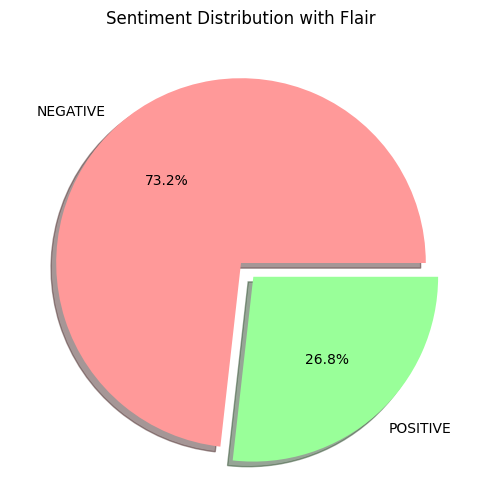

In [ ]:
# Plotting sentiment distribution
plt.figure(figsize=(8, 6))
plt.title('Sentiment Distribution with Flair')
# only "explode" the 2nd slice
explode = (0, 0.1)
colors = ['#ff9999','#99ff99']
plt.pie(sentiment_counts3, labels=sentiment_counts3.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True)
plt.show()

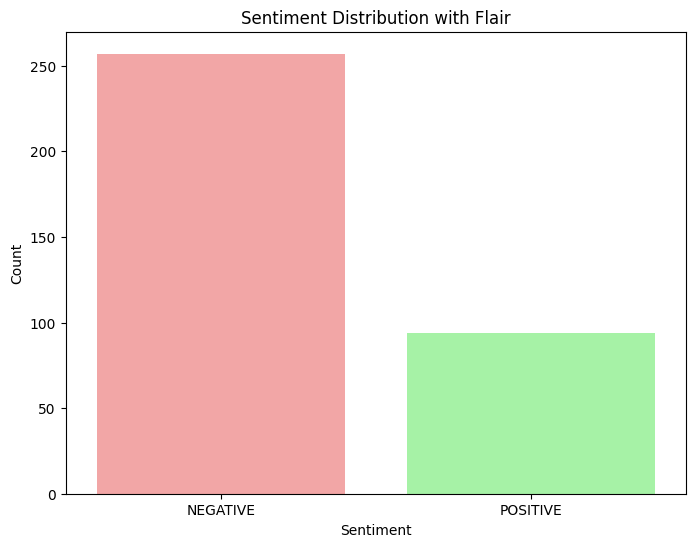

In [ ]:
# Plotting sentiment distribution as a bar plot
plt.figure(figsize=(8, 6))
colors = ['#ff9999','#99ff99']
sns.barplot(x=sentiment_counts3.index, y=sentiment_counts3.values, hue=sentiment_counts3.index, palette=colors, legend=False)
plt.title('Sentiment Distribution with Flair')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Filter positive and negative reviews
positive_reviews3 = ram_data[ram_data['analysis3'] == 'POSITIVE']['cleaned_reviews'].values
negative_reviews3 = ram_data[ram_data['analysis3'] == 'NEGATIVE']['cleaned_reviews'].values

# Join all positive and negative reviews into a single string
positive_text3 = ' '.join(positive_reviews3)
negative_text3 = ' '.join(negative_reviews3)

# Generate word clouds for positive and negative reviews
positive_wordcloud3 = WordCloud(width = 800, height = 800,
                colormap = 'magma',
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(positive_text3)

negative_wordcloud3 = WordCloud(width = 800, height = 800,
                colormap = 'magma',
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(negative_text3)

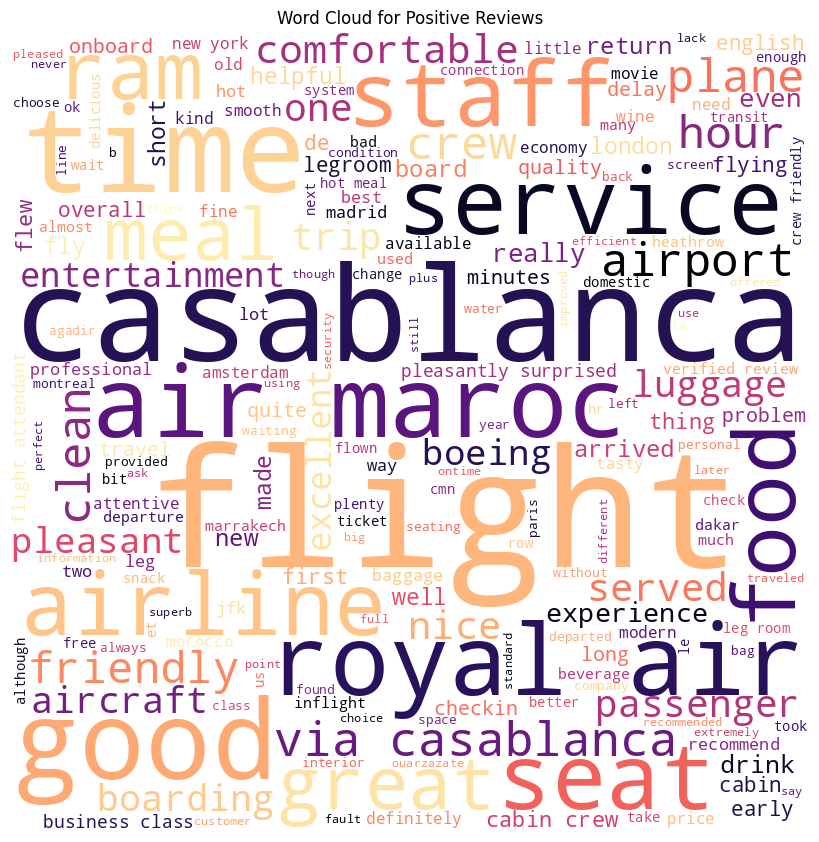

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(positive_wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Positive Reviews')
plt.show()

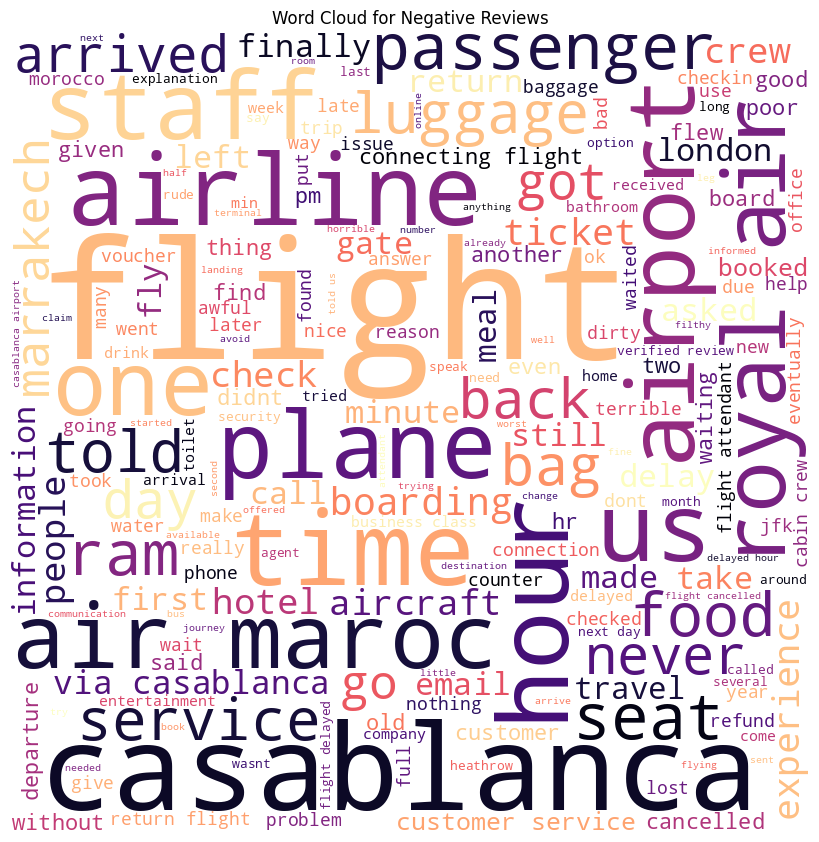

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(negative_wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Negative Reviews')
plt.show()

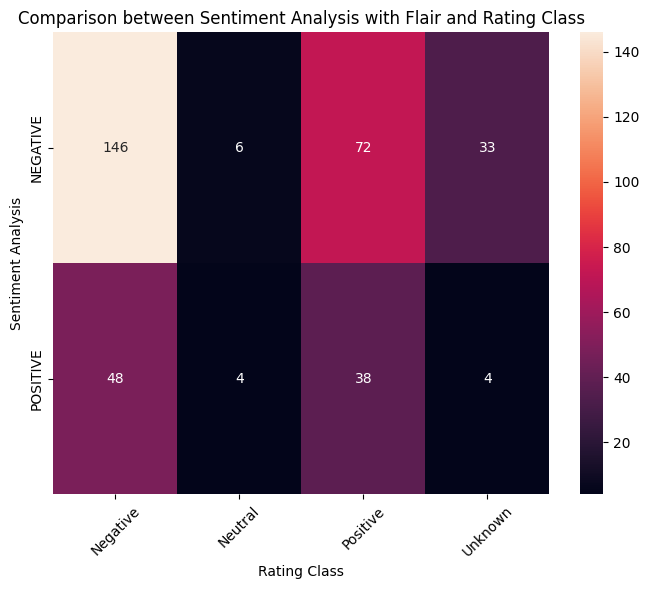

In [ ]:
# Plot a heatmap to visualize the comparison
plt.figure(figsize=(8, 6))
sns.heatmap(comparison3, annot=True, fmt='d')
plt.title('Comparison between Sentiment Analysis with Flair and Rating Class')
plt.xlabel('Rating Class')
plt.ylabel('Sentiment Analysis')
plt.xticks(rotation=45)
plt.show()

## **Comparison - Evaluation**

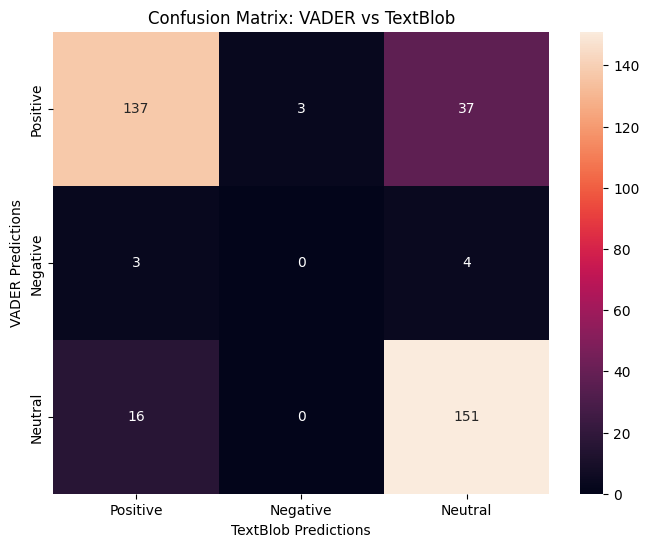

In [ ]:
# Create a confusion matrix for VADER and TextBlob
confusion_vader_txtb = confusion_matrix(ram_data['analysis'], ram_data['analysis2'])

sentiment_categories = ram_data['analysis'].unique()
sentiment_categories2 = ram_data['analysis2'].unique()

# Reorder sentiment_categories2 to match the order of sentiment_categories
sentiment_categories2_reordered = [cat for cat in sentiment_categories]

# Plot the confusion matrix with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_vader_txtb, annot=True, fmt='d', xticklabels=sentiment_categories2_reordered, yticklabels=sentiment_categories)
plt.xlabel('TextBlob Predictions')
plt.ylabel('VADER Predictions')
plt.title('Confusion Matrix: VADER vs TextBlob')
plt.show()